In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv('/content/delivery_time.csv')

In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## #visualization

<ipython-input-7-a19a1e968863>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])
<ipython-input-7-a19a1e968863>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

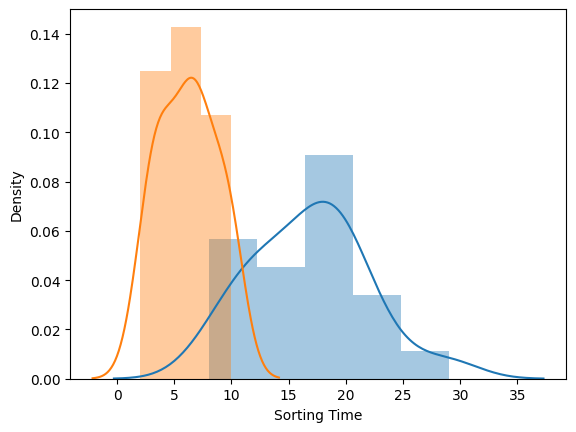

In [ ]:
sns.distplot(df['Delivery Time'])
sns.distplot(df['Sorting Time'])

In [ ]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

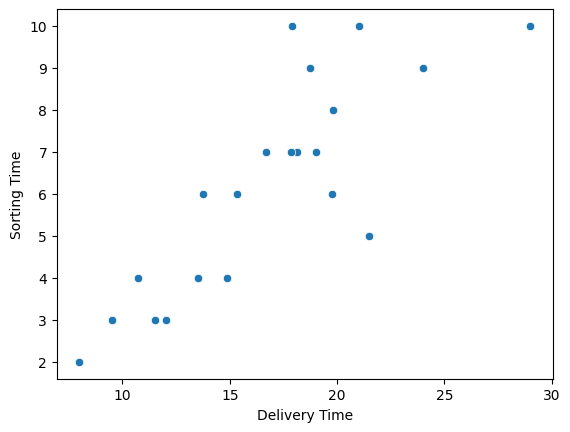

In [ ]:
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=df)

<Axes: >

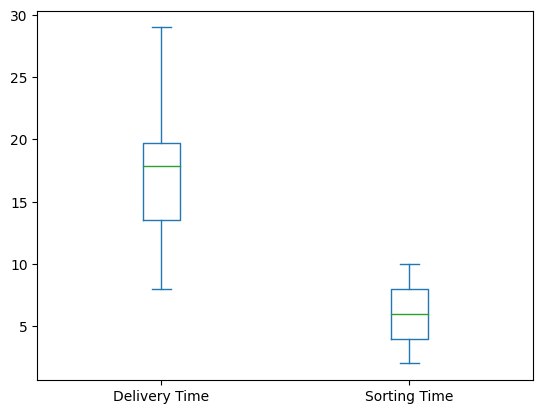

In [ ]:
df.plot.box()

In [ ]:
y=df['Delivery Time'].values.reshape(-1,1)
x=df['Sorting Time'].values.reshape(-1,1)

In [ ]:
y

In [ ]:
x

## splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=50)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(16, 1)
(16, 1)
(5, 1)
(5, 1)


## model building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(f"coefficient --> {lr.coef_}, y intercept --> {lr.intercept_}")

coefficient --> [[1.70204762]], y intercept --> [5.88197619]


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

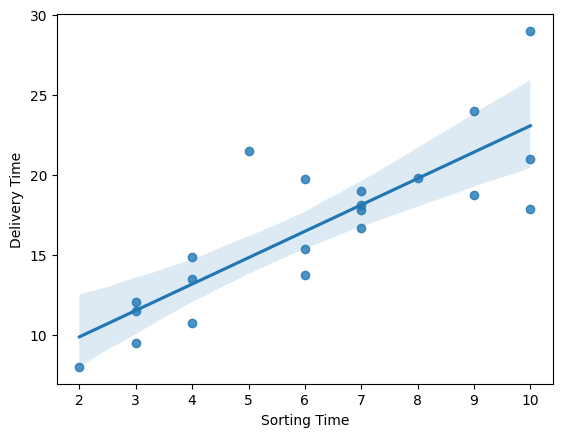

In [ ]:
sns.regplot(x='Sorting Time',y='Delivery Time',data = df)

## prediction

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([[14.39221429],
       [21.20040476],
       [19.49835714],
       [17.79630952],
       [21.20040476]])

## error analysis

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.544623809523808
Mean Squared Error: 12.894791357482996
R_Squared score(test): -1.706637962787584


## Applying transformation techniques

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
df

In [ ]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(df)
qtdf = qt.transform(df)
df_qt = pd.DataFrame(data=qtdf, columns=['Delivery Time','Sorting Time'])
df_qt.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (21). n_quantiles is set to n_samples.
  warnings.warn(


,Delivery Time,Sorting Time
0,0.85,1.000
1,0.25,0.225
2,0.75,0.450
3,0.95,0.825
4,1.00,1.000


In [ ]:
mx_qt=df_qt[['Delivery Time']].values
y_qt=df_qt['Sorting Time'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train_qt, x_test_qt, y_train_qt, y_test_qt = train_test_split(x_qt, y_qt,
                            train_size=0.8, random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train_qt, y_train_qt)

LinearRegression()

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

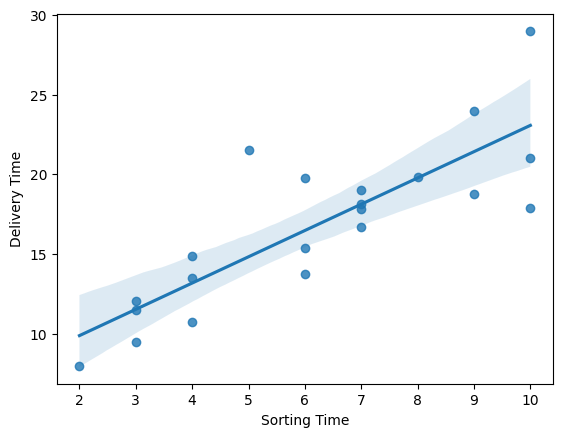

In [ ]:
sns.regplot(x='Sorting Time',y='Delivery Time',data = df)

In [ ]:
y_pred_qt = model2.predict(x_test_qt)

In [ ]:
df_final_qt = pd.DataFrame({'Actual': y_test_qt, 'Predicted': y_pred_qt})
df_final_qt

,Actual,Predicted
0,0.350,0.928632
1,0.825,0.677557
2,0.750,0.828202
3,0.625,0.526912
4,0.825,0.978847


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test_qt, y_pred_qt))
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test_qt, y_pred_qt))
print('R_Squared score(test):',
        metrics.r2_score(y_test_qt, y_pred_qt))

Mean Absolute Error: 0.21124244537424447
Mean Squared Error: 0.07919204456140426
R_Squared score(test): -1.4942376239812365


## Linear regression using ols technique

In [ ]:
df_ols=df.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})
df_ols.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
import statsmodels.formula.api as smf
model_ols=smf.ols('Delivery_time~Sorting_time',data=df_ols).fit()

In [ ]:
model_ols.rsquared

0.6822714748417231

In [ ]:
model_ols.summary()

## Applying logarithmic transformations

In [ ]:
model_log=smf.ols('np.log(Delivery_time)~np.log(Sorting_time)',data=df_ols).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 23 Nov 2023   Prob (F-statistic):           1.60e-07
Time:                           14:17:11   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## conclusion: Thus, with some transformations,the Accuracy has been enhanced to 77% and less errors
